# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.125843e+01     7.179724e+00
 * time: 0.005528926849365234
     1     2.996258e+01     5.665412e+00
 * time: 0.01603984832763672
     2     2.497097e+01     9.335106e+00
 * time: 0.04198002815246582
     3     1.908291e+01     6.080544e+00
 * time: 0.07233190536499023
     4     1.234040e+01     1.553362e+00
 * time: 0.10264396667480469
     5     1.219062e+01     2.416299e+00
 * time: 0.12437891960144043
     6     1.104215e+01     1.716274e+00
 * time: 0.14810705184936523
     7     1.066044e+01     1.775424e+00
 * time: 0.16948890686035156
     8     1.027569e+01     8.913695e-01
 * time: 0.19074201583862305
     9     9.751664e+00     9.612376e-01
 * time: 0.21115684509277344
    10     9.480683e+00     8.119622e-01
 * time: 0.23125004768371582
    11     9.350598e+00     7.934500e-01
 * time: 0.2512240409851074
    12     9.234580e+00     4.748343e-01
 * time: 0.2712888717651367
    13     9.161875e+00     7.256202e-01
 * time: 

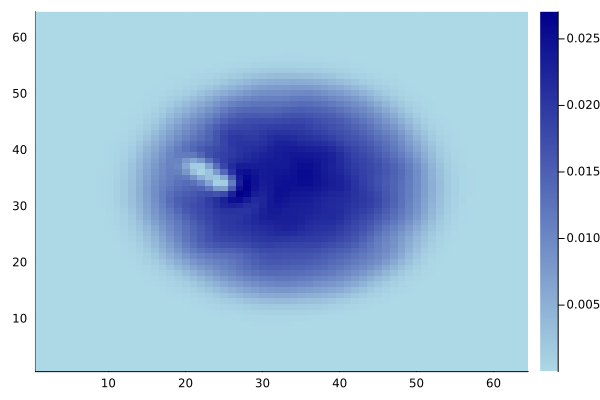

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)